# Practice Problem - Monte-Carlo Error Propagation - Sample Solution

Let's start off by defining the values and uncertainties, along with some constants:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Defined constant(s)
G = 6.67384e-11  # SI units

# Define values to sample from
mean_m_1 = 40.e4
sigma_m_1 = 0.05e4
mean_m_2 = 30.e4
sigma_m_2 = 0.1e4
mean_r = 3.2
sigma_r = 0.01

We can now compute the mean and uncertainty in the force using standard error propagation:

In [3]:
# Compute mean and error of force
mean_f = G * mean_m_1 * mean_m_2 / mean_r ** 2
sigma_f = mean_f * np.sqrt((sigma_m_1 / mean_m_2) ** 2
                           + (sigma_m_2 / mean_m_2) ** 2
                           + 4. * (sigma_r / mean_r) ** 2)
print(mean_f, sigma_f)

0.7820906249999999 0.00569109398721


We can also compute this using Monte-Carlo error propagation. We sample ``N`` initial values that are drawn from the initial distributions:

In [4]:
N = 1000000
m_1 = np.random.normal(mean_m_1, sigma_m_1, N)
m_2 = np.random.normal(mean_m_2, sigma_m_2, N)
r = np.random.normal(mean_r, sigma_r, N)

and for each sample, we can compute the final value:

In [5]:
F = G * m_1 * m_2 / r ** 2

We can print for these the mean and standard deviation:

In [6]:
print(np.mean(F), np.std(F))

0.782114569479 0.00562936559825


which is similar to the values found above, but in fact we have the full distribution of values, which we can plot a histogram for, along with a curve showing the Gaussian function for the result found from standard error propagation:

(0.75, 0.82)

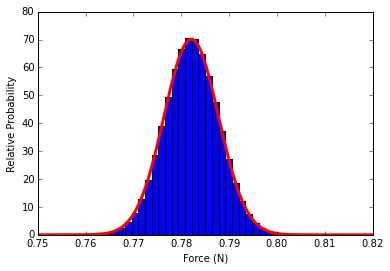

In [7]:
# Define range of output values for plotting
xmin = 0.75
xmax = 0.82

# Define Gaussian function

def gaussian(x, mu, sigma):
    norm = 1. / (sigma * np.sqrt(2. * np.pi))
    return norm * np.exp(-(x - mu) ** 2. / (2. * sigma ** 2))

x = np.linspace(xmin, xmax, 1000)
y = gaussian(x, mean_f, sigma_f)

plt.hist(F, bins=50, range=[xmin, xmax], normed=True)
plt.plot(x, y, color='red', lw=3)
plt.xlabel("Force (N)")
plt.ylabel("Relative Probability")
plt.xlim(xmin, xmax)

The two agree very nicely. Now let's repeat this, but with larger initial errors:

The distribution of the sampled values agrees well with that found from standard error propagation. We can now repeat the experiment with larger uncertainties:

(-1.0, 5.0)

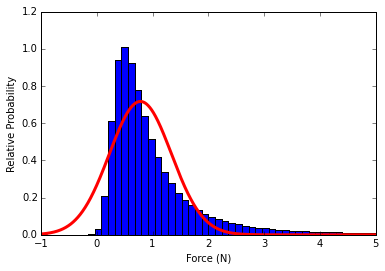

In [8]:
# Define values to sample from
mean_m_1 = 40.e4
sigma_m_1 = 2.e4
mean_m_2 = 30.e4
sigma_m_2 = 10.e4
mean_r = 3.2
sigma_r = 1.0

# Define range of output values for plotting
xmin = -1.
xmax = 5.

# Define number of samples
N = 1000000

## STANDARD ERROR PROPAGATION

# Compute mean and error of force
mean_f = G * mean_m_1 * mean_m_2 / mean_r ** 2
sigma_f = mean_f * np.sqrt((sigma_m_1 / mean_m_2) ** 2
                           + (sigma_m_2 / mean_m_2) ** 2
                           + 4. * (sigma_r / mean_r) ** 2)

# Define Gaussian function
x = np.linspace(xmin, xmax, 1000)
y = gaussian(x, mean_f, sigma_f)

## MONTE-CARLO ERROR PROPAGATION

# Sample from initial values
m_1 = np.random.normal(mean_m_1, sigma_m_1, N)
m_2 = np.random.normal(mean_m_2, sigma_m_2, N)
r = np.random.normal(mean_r, sigma_r, N)

# Compute final values
F = G * m_1 * m_2 / r ** 2

## PLOTTING

plt.hist(F, bins=50, range=[xmin, xmax], normed=True)
plt.plot(x, y, color='red', lw=3)
plt.xlabel("Force (N)")
plt.ylabel("Relative Probability")
plt.xlim(xmin, xmax)

The distribution of sampled points is now significantly non-Gaussian, which is normal because the uncertainties are large, and standard error propagation only works for small errors. The conclusion is that Monte-Carlo propagation is easier to code (because one doesn't need to remember all the propagation equations) and is also more correct because it can take into account non-Gaussian distributions (of input or output).